# Part I: Generating Synthetic Data Using Simulated Attributes



In [1]:
import random
import numpy as np
import pandas as pd
from datetime import date, timedelta
from sklearn import preprocessing

## `Instructor` Class 

The `Instructor` class represents an instructor with various attributes normalized on a scale of 0 to 1.

### Attributes

- **name** : Name of the instructor.
- **experience** : Experience of the instructor (0 = no experience, 1 = very experienced).
- **knowledge** : Knowledge of the instructor (0 = no knowledge, 1 = very knowledgeable).
- **communication** : Communication skills of the instructor (0 = poor communication, 1 = excellent communication).
- **creativity** : Creativity of the instructor (0 = not creative, 1 = very creative).
- **adaptability** : Adaptability of the instructor (0 = not adaptable, 1 = very adaptable).
- **professionalism** : Professionalism of the instructor (0 = completely unprofessional, 1 = very professional).
- **friendliness** : Friendliness of the instructor (0 = completely unfriendly, 1 = very friendly).
- **patience** : Patience of the instructor (0 = completely impatient, 1 = very patient).
- **humor** : Sense of humor of the instructor (0 = completely boring, 1 = very humorous).

In [2]:
class Instructor:
    def __init__(self, name, experience, knowledge, communication, creativity,adaptability, professionalism, friendliness, patience, humor):
        self.name = name
        self.experience = experience  # Normalized scale 0 to 1: 0 being no experience, 1 being highly experienced
        self.knowledge = knowledge  # Normalized scale 0 to 1: 0 being no knowledge, 1 being highly knowledgeable
        self.communication = communication  # Normalized scale 0 to 1: 0 being poor communication, 1 being excellent communication
        self.creativity = creativity  # Normalized scale 0 to 1: 0 being not creative, 1 being highly creative
        self.adaptability = adaptability  # Normalized scale 0 to 1: 0 being not adaptable, 1 being highly adaptable
        self.professionalism = professionalism  # Normalized scale 0 to 1: 0 being completely unprofessional, 1 being highly professional
        self.friendliness = friendliness  # Normalized scale 0 to 1: 0 being completely unfriendly, 1 being highly friendly
        self.patience = patience  # Normalized scale 0 to 1: 0 being completely impatient, 1 being highly patient
        self.humor = humor  # Normalized scale 0 to 1: 0 being completely annoying, 1 being highly humorous

    def technical_skills(self):
        return self.knowledge + self.communication + self.creativity + self.adaptability
    def social_skills(self):
        return self.professionalism + self.friendliness + self.patience + self.humor

    def overall_quality(self,uniform_weights=False):
        # Calculate a weighted score for overall quality, considering new attributes
        traits=np.array(list(self.__dict__.values())[1:])
        weights = np.array([0.20, 0.18, 0.15, 0.12, 0.10, 0.08, 0.07, 0.06, 0.04])
        if uniform_weights:
            weights=np.ones(traits.shape) # equivalent weights for now
        return np.dot(traits,weights)/sum(weights)


## `Employee` Class 

The `Employee` class represents an employee with various attributes.

### Attributes

- **name** : Employee name.
- **motivation** : Employee motivation.
- **learning_speed** : Employee learning speed.
- **attention** : Employee attentiveness.
- **openness** : Employee open-mindedness.
- **friendlines** : Employee friendliness.

In [3]:
class Employee:
    def __init__(self, name, motivation, learning_speed, attention, openness, friendlines):
        self.name = name
        self.motivation = motivation
        self.learning_speed = learning_speed
        self.attention = attention
        self.openness = openness
        self.friendlines = friendlines
    def technical_skills(self):
        return self.learning_speed + self.attention + self.openness
    def social_skills(self):
        return self.friendlines + self.openness + self.attention


## Covariance Matrix for Instructors

To generate a covariance matrix for instructor traits, we need to consider the realistic relationships between these traits. Here is a reasonable assumption about how these traits might be correlated:

1. **Experience** and **Knowledge** are likely to be positively correlated, because more experienced instructors often have more knowledge.
2. **Communication** skills might be positively correlated with **Friendliness** and **Professionalism**, because good communicators often present themselves professionally and are likeable.
3. **Creativity** and **Adaptability** might be positively correlated, because creative instructors can adapt their teaching methods.
4. **Professionalism** might be positively correlated with **Patience**, because professional instructors tend to be patient.
5. **Humor** might have a positive but weaker correlation with **Friendliness** and **Communication**.

6. **Friendliness** might be positively correlated with **Patience** and **Humor**.

Let's create a covariance matrix based on these assumptions. Note that the diagonal elements represent the variances and are set to 0.08 for this example, indicating moderate dispersion. The off-diagonal elements represent the covariances and are set to varying degrees to reflect the relationships mentioned.

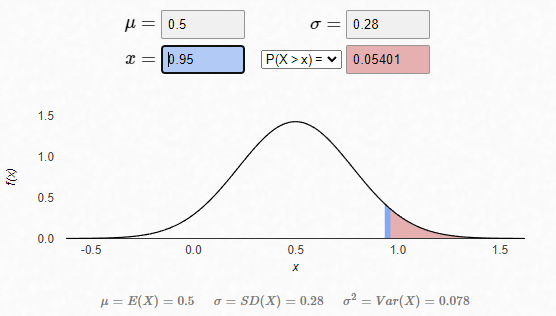

In [7]:
traits = "experience,knowledge,communication,creativity,adaptability,professionalism,friendliness,patience,humor".split(",")
instructor_cov=np.array([
[0.08,0.05,0.02,0.01,0.01,0.03,0.01,0.01,0.01],
[0.05,0.08,0.03,0.02,0.02,0.04,0.02,0.01,0.02],
[0.02,0.03,0.08,0.01,0.01,0.05,0.04,0.03,0.03],
[0.01,0.02,0.01,0.08,0.04,0.02,0.01,0.01,0.02],
[0.01,0.02,0.01,0.04,0.08,0.02,0.02,0.03,0.01],
[0.03,0.04,0.05,0.02,0.02,0.08,0.03,0.04,0.02],
[0.01,0.02,0.04,0.01,0.02,0.03,0.08,0.04,0.05],
[0.01,0.01,0.03,0.01,0.03,0.04,0.04,0.08,0.03],
[0.01,0.02,0.03,0.02,0.01,0.02,0.05,0.03,0.08],
])

Instructor_mean = np.array([0.6] *len(traits))  # Example mean

num_samples = 1000

# Generate the data
data = np.random.multivariate_normal(Instructor_mean, instructor_cov, num_samples)

In [8]:
Instructors = pd.DataFrame(data, columns=traits)
Instructors.describe()

,experience,knowledge,communication,creativity,adaptability,professionalism,friendliness,patience,humor
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.601700,0.601684,0.595840,0.610815,0.594919,0.602190,0.603757,0.614360,0.600374
std,0.290372,0.300256,0.299079,0.280548,0.284521,0.293470,0.278679,0.278604,0.275020
min,-0.364568,-0.574939,-0.442328,-0.297637,-0.336220,-0.514566,-0.384626,-0.375450,-0.545149
25%,0.395677,0.409029,0.397800,0.428527,0.405257,0.406428,0.430117,0.433247,0.407274
50%,0.609318,0.602956,0.590510,0.608566,0.593363,0.610536,0.613413,0.606364,0.603623
75%,0.800900,0.810163,0.801319,0.792038,0.781097,0.811455,0.788755,0.800923,0.794063
max,1.558239,1.556603,1.623376,1.456469,1.487047,1.460428,1.505996,1.543234,1.497220


The `describe` method generates descriptive statistics for instructor attributes, such as mean, standard deviation, minimum and maximum values, etc.

**Normalization of instructor values**: The `clip` method is used to limit instructor attribute values ​​between 0 and 1.

In [9]:
Instructors=Instructors.clip(lower=0,upper=1)
Instructors.describe()

,experience,knowledge,communication,creativity,adaptability,professionalism,friendliness,patience,humor
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.593442,0.591926,0.585910,0.601630,0.586774,0.593877,0.598075,0.604873,0.594053
std,0.264967,0.271374,0.268862,0.254854,0.257331,0.266140,0.254415,0.252711,0.256233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395677,0.409029,0.397800,0.428527,0.405257,0.406428,0.430117,0.433247,0.407274
50%,0.609318,0.602956,0.590510,0.608566,0.593363,0.610536,0.613413,0.606364,0.603623
75%,0.800900,0.810163,0.801319,0.792038,0.781097,0.811455,0.788755,0.800923,0.794063
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
def histogram(series):
    ax=series.hist(bins=10, edgecolor='black')
    ax.set_axisbelow(True)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha='center', fontsize=8)
    plt.grid(alpha=0.3)
    plt.title(f"Histogram of {series.name}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## Visualization of generated distributions

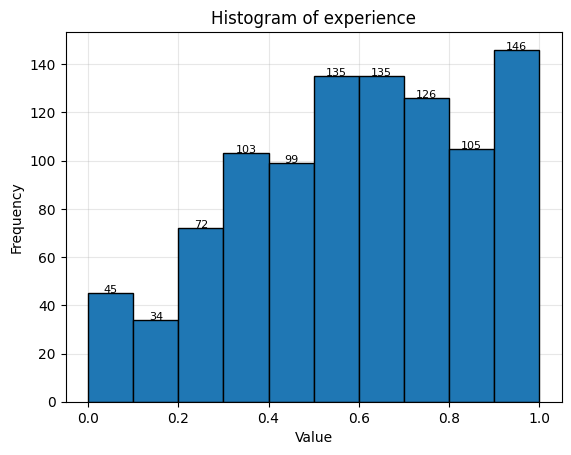

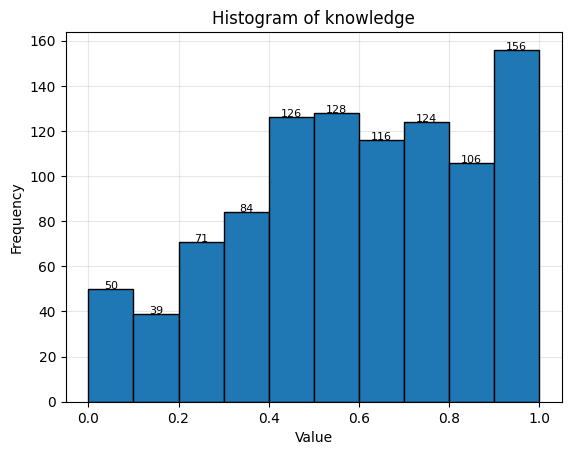

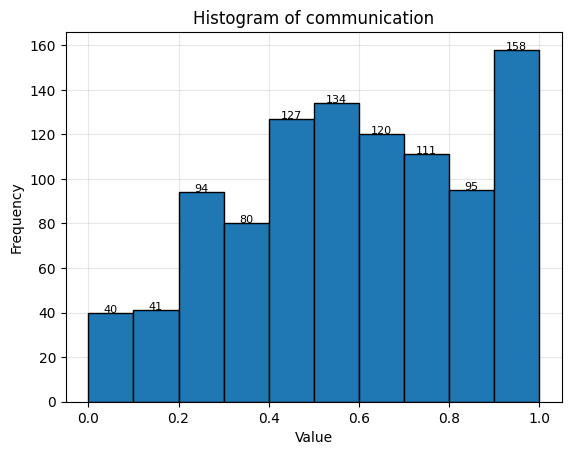

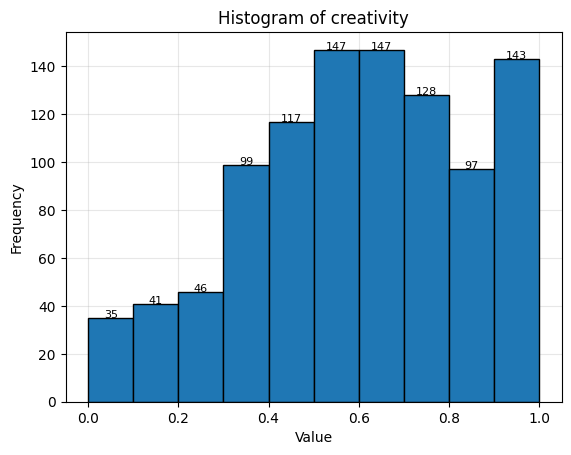

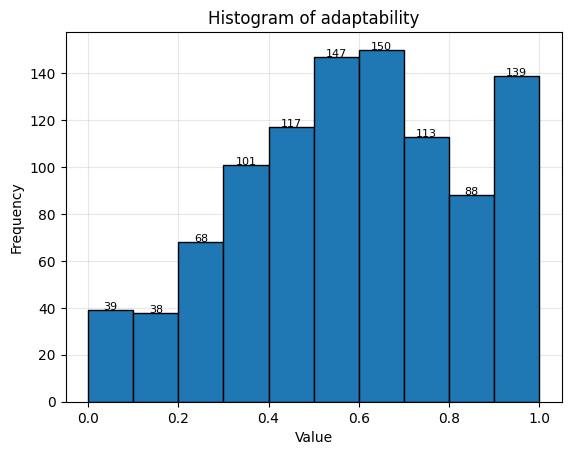

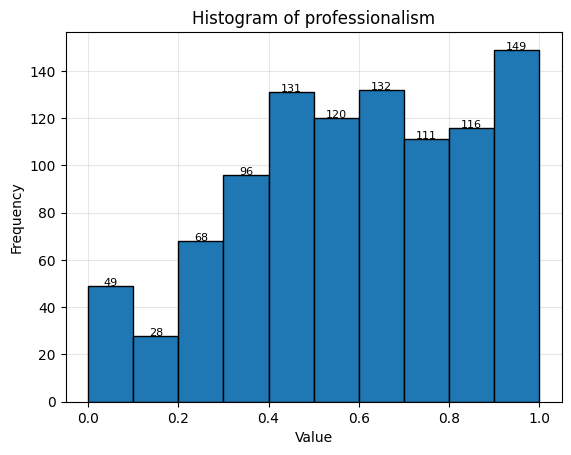

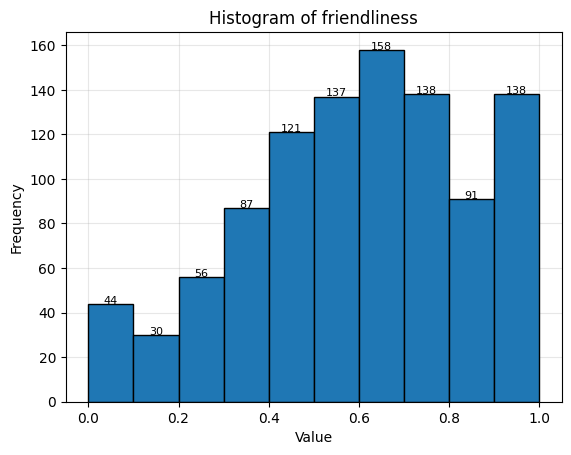

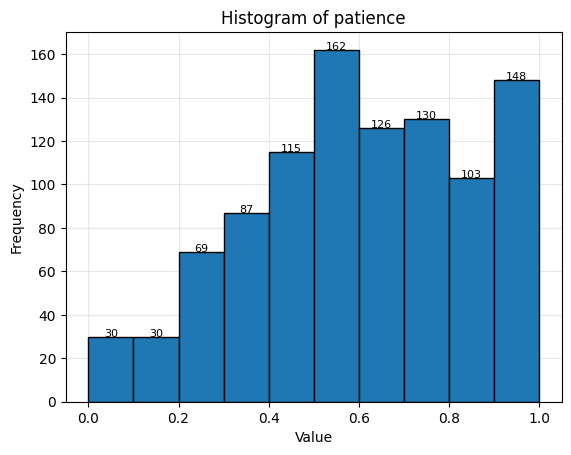

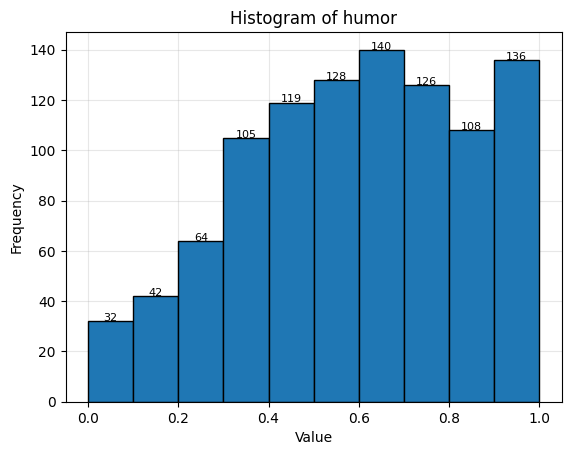

In [11]:
from matplotlib import pyplot as plt

for col in Instructors.columns:
    histogram(Instructors[col])

## Description of the generated distributions

We can clearly see that the generated attributes follow a normal distribution. This observation is important because it helps ensure that the simulated data are realistic and representative of the expected instructor traits. A normal distribution of attributes also facilitates statistical analysis and the application of various modeling methods.

---

We can also clearly see the covariance matrix in action, with attributes that covary together and are correlated. This observation is crucial because it shows how instructor traits interact with each other, reflecting realistic relationships. Understanding these correlations helps improve the accuracy of predictive models and gain deeper insights into the dynamics of instructor traits.

In [12]:
for i,e in enumerate(Instructors.head().values):
    instructor = Instructor("Instructor"+str(i),*e)
    s=pd.Series(e,index=Instructors.columns.values)
    print(s)
    print("Overall Quality :",instructor.overall_quality())
    print('-'*50)
    print('\n')

experience         0.854061
knowledge          0.942242
communication      0.954786
creativity         0.183036
adaptability       0.193324
professionalism    1.000000
friendliness       1.000000
patience           0.945884
humor              0.939603
dtype: float64
Overall Quality : 0.7692675274539794
--------------------------------------------------


experience         0.395897
knowledge          0.444691
communication      0.659909
creativity         0.663570
adaptability       0.773267
professionalism    0.467214
friendliness       0.802654
patience           1.000000
humor              0.898827
dtype: float64
Overall Quality : 0.6046813643303172
--------------------------------------------------


experience         0.423410
knowledge          1.000000
communication      1.000000
creativity         0.825834
adaptability       0.830228
professionalism    1.000000
friendliness       1.000000
patience           0.863233
humor              1.000000
dtype: float64
Overall Quality : 0

### Cumulative instructor score

In [13]:
def calculate_quality(row):
    index = row.name  # Get the index of the row
    instructor = Instructor(f"Instructor{index}",*row)
    return instructor.overall_quality()
Instructors["Overall Score"]=Instructors.apply(calculate_quality, axis=1)

In [14]:
print(Instructors.loc[Instructors["Overall Score"]==Instructors["Overall Score"].max()])
Instructors["Overall Score"]

    experience  knowledge  communication  creativity  adaptability  \
50         1.0        1.0            1.0    0.745027           1.0   

    professionalism  friendliness  patience  humor  Overall Score  
50              1.0           1.0  0.999122    1.0       0.969351  


0      0.769268
1      0.604681
2      0.838599
3      0.829743
4      0.665999
         ...   
995    0.662904
996    0.707959
997    0.671476
998    0.542261
999    0.804814
Name: Overall Score, Length: 1000, dtype: float64

We can also see that a linear combination of centered normal distributions (``Overall Score``) follows a centered normal distribution as well.

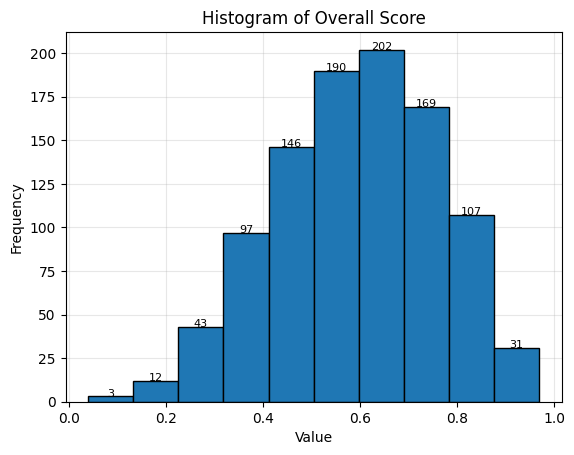

In [15]:
histogram(Instructors["Overall Score"])

## Employee Covariance Matrix
Generated similarly to the Instructor Covariance Matrix

In [16]:
traits = "motivation,learning_speed,attention,openness,friendlines".split(",")
employee_cov=np.array([
[0.09,0.07,0.06,0.05,0.03],
[0.07,0.08,0.06,0.05,0.02],
[0.06,0.06,0.07,0.05,0.03],
[0.05,0.05,0.05,0.09,0.04],
[0.03,0.02,0.03,0.04,0.06],
])

employee_mean = np.array([0.5]*len(traits))  # Example mean

num_samples = 1000 

# Generate the data
data = np.random.multivariate_normal(employee_mean, employee_cov, num_samples)

In [17]:
data=pd.DataFrame(data, columns=traits)
employees=data.clip(lower=0,upper=1)
employees.head()

,motivation,learning_speed,attention,openness,friendlines
0,0.901967,0.815642,0.766140,0.438340,0.180329
1,0.521252,0.664944,0.594936,0.365655,0.410252
2,0.212684,0.367671,0.485539,0.222219,0.193013
3,0.682312,0.765572,0.452319,1.000000,0.267804
4,0.658834,0.480101,0.555587,0.435595,0.490496


### Visualization of generated distributions

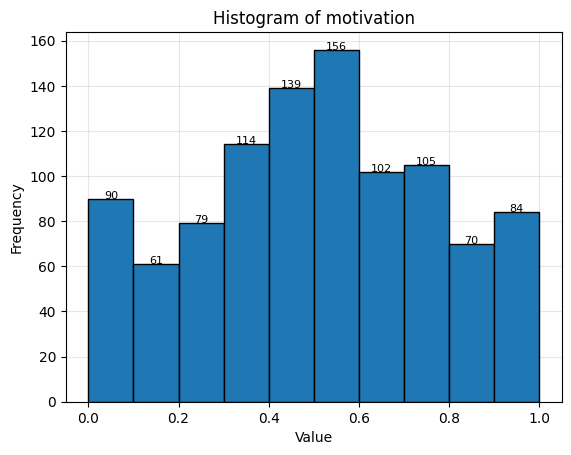

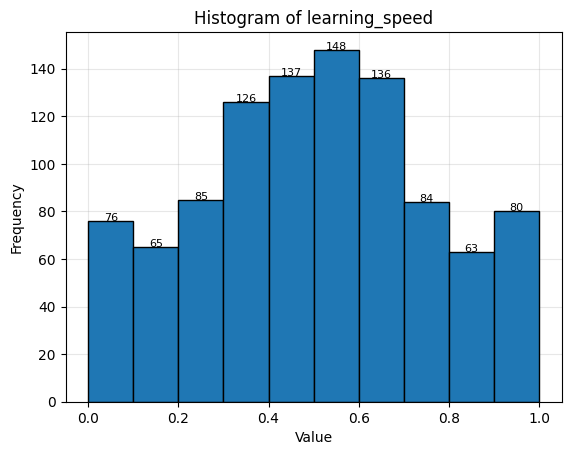

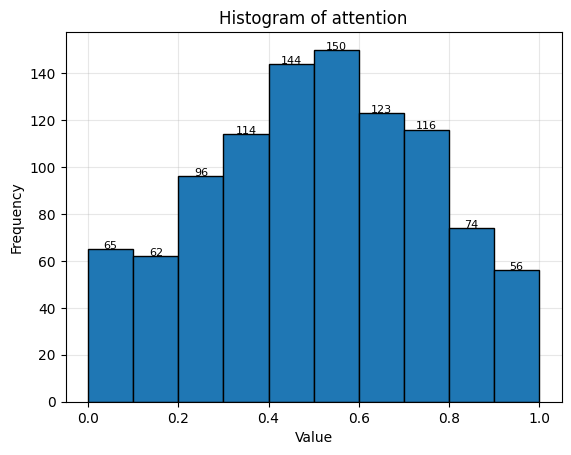

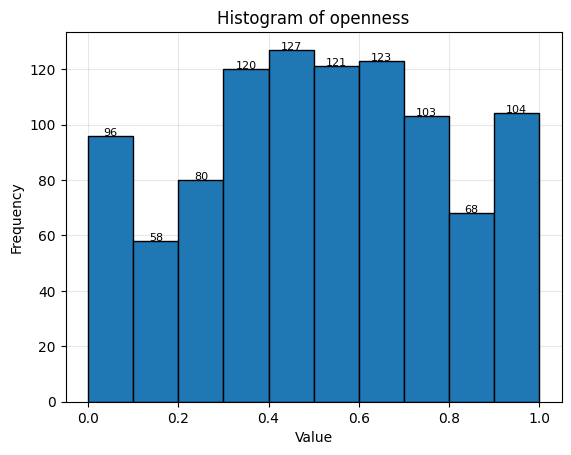

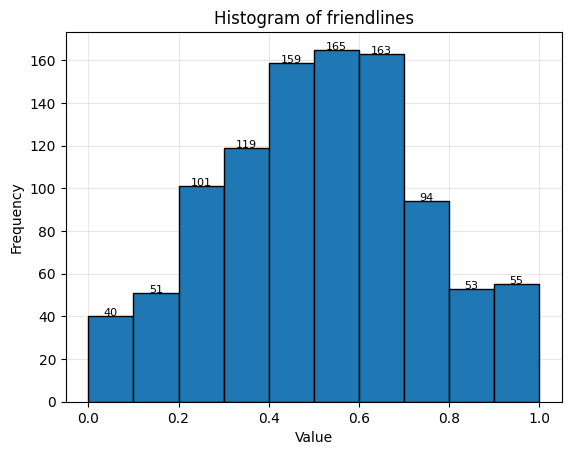

In [18]:
for col in employees.columns:
    histogram(employees[col])

### Names Generation

In [19]:
tunisian_names = pd.Series([
    "Ahmed", "Ali", "Amine", "Anis", "Aymen",
    "Aziz", "Bilel", "Chaker", "Chamseddine", "Cherif",
    "Fares", "Fathi", "Ghassen", "Habib", "Hatem",
    "Hedi", "Hichem", "Iheb", "Imed", "Jamel",
    "Karim", "Khaled", "Lotfi", "Maher", "Mahmoud",
    "Moez", "Mokhtar", "Mohamed", "Moncef", "Mourad",
    "Nabil", "Nader", "Nassif", "Nizar", "Omar",
    "Rached", "Raouf", "Riad", "Ridha", "Sami",
    "Sofiane", "Slaheddine", "Slim", "Tarek", "Walid",
    "Wissem", "Yacine", "Yassine", "Zied", "Zouhair",
    "Aida", "Amel", "Amina", "Asma", "Aziza",
    "Beya", "Bouthayna", "Chahinez", "Dalila", "Emna",
    "Faten", "Fatma", "Ghada", "Hajer", "Hela",
    "Hiba", "Ikram", "Ines", "Jihen", "Kawther",
    "Leila", "Lina", "Maha", "Malek", "Marwa",
    "Meriem", "Mouna", "Nadia", "Naima", "Najla",
    "Nesrine", "Nour", "Olfa", "Ons", "Rahma",
    "Rania", "Rim", "Rym", "Sarra", "Sihem",
    "Syrine", "Wafa", "Wiem", "Yosra", "Zahra"
])
tunisian_surnames = pd.Series([
    "Abdelkafi", "Abdelmoula", "Abidi", "Achour", "Ammar",
    "Ayari", "Baklouti", "Barhoumi", "Ben Ammar", "Ben Ayed",
    "Ben Hassen", "Ben Miled", "Ben Mustapha", "Ben Romdhane", "Ben Slimane",
    "Ben Yedder", "Bouaziz", "Bouhlel", "Boulaares", "Chaabane",
    "Chaouch", "Cherif", "Chetti", "Chikhaoui", "Daghfous",
    "Dahmani", "Daly", "Dhaoui", "Dridi", "Fekih",
    "Gharbi", "Ghariani", "Ghodbane", "Ghozzi", "Ghribi",
    "Haddad", "Hammami", "Hannachi", "Harbaoui", "Hattab",
    "Hedhli", "Hjiej", "Hlali", "Jaziri", "Jemai",
    "Jendoubi", "Kacem", "Khalfallah", "Khalifa", "Khemiri",
    "Kouki", "Krayem", "Krichene", "Laabidi", "Lajili",
    "Lazreg", "Loussaief", "Ltaief", "Mabrouk", "Maatoug",
    "Mansour", "Masri", "Masmoudi", "Mathlouthi", "Mekki",
    "Mhiri", "Miladi", "Mnif", "Mokded", "Mrad",
    "Najjar", "Nefzi", "Ouertani", "Riahi", "Riaoui",
    "Romdhane", "Saad", "Saadi", "Saadallah", "Saidi",
    "Sakli", "Sellami", "Sfar", "Sghaier", "Sghir",
    "Slama", "Souid", "Touati", "Trabelsi", "Triki",
    "Turki", "Zaabi", "Zaafrani", "Zaghdoudi", "Zemni"
])
#10K total possible combinations

num_rows=Instructors.shape[0]
combinations= [(name, surname) for name in tunisian_names for surname in tunisian_surnames]
ins_combinations = random.sample(combinations, num_rows) # Generate unique combinations
emp_combinations = random.sample([comb for comb in combinations if comb not in ins_combinations], num_rows) # different from instructors

ins_names = [name + ' ' + surname for name, surname in ins_combinations]
emp_names = [name + ' ' + surname for name, surname in emp_combinations]

# Assign names and surnames to the DataFrame
if 'Name' not in Instructors.columns:
    Instructors['Name'] = ins_names
    Instructors=Instructors[["Name"]+list(Instructors.columns[:-1])]
    
if 'Name' not in employees.columns:
    employees['Name'] = emp_names
    employees=employees[["Name"]+list(employees.columns[:-1])]
Instructors.head(5)

,Name,experience,knowledge,communication,creativity,adaptability,professionalism,friendliness,patience,humor,Overall Score
0,Hiba Saidi,0.854061,0.942242,0.954786,0.183036,0.193324,1.000000,1.000000,0.945884,0.939603,0.769268
1,Hedi Maatoug,0.395897,0.444691,0.659909,0.663570,0.773267,0.467214,0.802654,1.000000,0.898827,0.604681
2,Wiem Ouertani,0.423410,1.000000,1.000000,0.825834,0.830228,1.000000,1.000000,0.863233,1.000000,0.838599
3,Mouna Khemiri,0.936755,0.927946,0.770404,0.554901,0.717803,1.000000,0.966437,0.913849,0.473780,0.829743
4,Rania Dahmani,0.480953,0.684627,0.827139,0.541346,0.826664,0.502693,0.603532,0.920184,0.930072,0.665999


In [20]:
employees.head(5)

,Name,motivation,learning_speed,attention,openness,friendlines
0,Zouhair Sakli,0.901967,0.815642,0.766140,0.438340,0.180329
1,Amel Masmoudi,0.521252,0.664944,0.594936,0.365655,0.410252
2,Khaled Ghariani,0.212684,0.367671,0.485539,0.222219,0.193013
3,Ikram Trabelsi,0.682312,0.765572,0.452319,1.000000,0.267804
4,Chahinez Jaziri,0.658834,0.480101,0.555587,0.435595,0.490496


In [21]:
print(Instructors["Name"].unique().size)
print(employees["Name"].unique().size)
Instructors.loc[Instructors["Name"].isin(employees["Name"])]
#All unique with no union


1000
1000


,Name,experience,knowledge,communication,creativity,adaptability,professionalism,friendliness,patience,humor,Overall Score


### Random selection of 10 good, 10 intermediate and 10 bad instructors according to ``Overall Score`` for the simulated sample

In [22]:
bad=Instructors.loc[Instructors["Overall Score"]<=0.333].sample(20)
medium=Instructors.loc[(Instructors["Overall Score"]>=0.333) & (Instructors["Overall Score"]<=0.666)].sample(20)
good=Instructors.loc[Instructors["Overall Score"]>0.666].sample(20)
Instructors_Sample=pd.concat([bad,medium,good])
Instructors_Sample.reset_index(inplace=True)
Instructors_Sample

,index,Name,experience,knowledge,communication,creativity,adaptability,professionalism,friendliness,patience,humor,Overall Score
0,452,Zouhair Mnif,0.092402,0.000000,0.303828,0.103761,0.248058,0.326658,0.577916,1.000000,0.626783,0.252970
1,28,Dalila Zemni,0.384140,0.220349,0.219831,0.000000,0.000000,0.000000,0.000000,0.000000,0.048019,0.151386
2,980,Ahmed Sghir,0.363047,0.260829,0.201374,0.592128,0.348060,0.619414,0.263798,0.000000,0.128435,0.328782
3,919,Slim Dahmani,0.156438,0.079288,0.374281,0.527516,0.510164,0.328371,0.138804,0.413308,0.263442,0.287342
4,373,Maha Sellami,0.308262,0.097099,0.027579,0.702472,0.454306,0.379754,0.520647,0.500039,0.420820,0.326655
5,535,Naima Romdhane,0.360716,0.000000,0.495617,0.129998,0.144949,0.456546,0.574476,0.569836,0.626444,0.312565
6,863,Zied Mansour,0.291736,0.205173,0.133161,0.164258,0.435617,0.000000,0.279340,0.538801,0.182687,0.237714
7,424,Zied Sfar,0.000000,0.000000,0.290571,0.302781,0.112788,0.000000,0.000000,0.000000,0.254948,0.101396
8,87,Ines Abdelkafi,0.011204,0.016813,0.187270,0.705654,0.519215,0.323670,0.362714,0.175871,0.729402,0.260969
9,70,Naima Najjar,0.018386,0.000000,0.109327,0.538542,0.258743,0.000000,0.233858,0.229273,0.575006,0.163702


## Courses Generation

In [23]:
course_names = [
    "Introduction to Cybersecurity",
    "Advanced Network Protocols",
    "Data Structures and Algorithms",
    "Machine Learning for Healthcare",
    "Cloud Computing Fundamentals",
    "Digital Health and Telemedicine",
    "Artificial Intelligence in Healthcare",
    "Health Informatics",
    "Mobile App Development",
    "Medical Data Analytics",
    "Web Development with JavaScript",
    "Bioinformatics and Genomics",
    "Database Management Systems",
    "Healthcare Information Systems",
    "Blockchain in Healthcare",
    "Programming with Python",
    "Healthcare IT Project Management",
    "Virtual Reality in Medicine",
    "Data Privacy and Security",
    "Healthcare Data Integration",
    "Introduction to Health IT",
    "Neural Networks and Deep Learning",
    "Health Data Visualization",
    "DevOps in Healthcare",
    "Health Monitoring with IoT",
    "Big Data in Healthcare",
    "Ethical Hacking",
    "Electronic Health Records",
    "Biostatistics for IT Professionals",
    "Robotics in Surgery"
]
cols=["Hours","Difficulty"]
mean=[30,0.6]
cov_mat=np.array([
    [5,0.4],
    [0.4,0.02],
])
Courses = np.random.multivariate_normal(mean,cov_mat, 30) 
Courses=pd.DataFrame(Courses,columns=cols)
Courses["Name"]=course_names
Courses["Difficulty"].clip(lower=0,upper=1,inplace=True)
Courses["Hours"]=Courses["Hours"].map(lambda h:int(h))
Courses=Courses[["Name","Hours","Difficulty"]]
Courses.sort_values(by="Hours")

/tmp/ipykernel_34/316927643.py:39: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  Courses = np.random.multivariate_normal(mean,cov_mat, 30)
/tmp/ipykernel_34/316927643.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Courses["Difficulty"].clip(lower=0,upper=1,inplace=True)


,Name,Hours,Difficulty
4,Cloud Computing Fundamentals,26,0.153451
0,Introduction to Cybersecurity,27,0.401662
11,Bioinformatics and Genomics,27,0.374550
17,Virtual Reality in Medicine,27,0.409998
20,Introduction to Health IT,27,0.484666
29,Robotics in Surgery,27,0.494056
23,DevOps in Healthcare,28,0.741854
7,Health Informatics,28,0.483441
18,Data Privacy and Security,28,0.447065
25,Big Data in Healthcare,28,0.475434


### Description

This code generates a feedback dataset by combining samples of instructors, employees, and courses. The main steps are:

For each combination of 60 instructors and 50 employees, data is extracted from the samples and combined, resulting in a dataset of ``3000 rows`` and ``20 columns``

In [24]:
cols=["instructor_Name","experience","knowledge","communication","creativity","adaptability","professionalism","instructor_friendliness","patience","humor","Overall" "Score"]
cols+=["employee_Name","motivation","learning_speed","attention","openness","employee_friendliness"]
cols+=["course_Name","duration_hours","difficulty"]
df=pd.DataFrame(columns=cols)
for i in range(60):
    for j in range(50):
        t=pd.concat([Instructors_Sample.loc[i,:],employees.sample().squeeze(axis=0),Courses.sample().squeeze(axis=0)],axis=0)
        df.loc[i*50+j]=t.values[1:]
df.to_csv("Feedback_Dataset.csv")
df

,instructor_Name,experience,knowledge,communication,creativity,adaptability,professionalism,instructor_friendliness,patience,humor,OverallScore,employee_Name,motivation,learning_speed,attention,openness,employee_friendliness,course_Name,duration_hours,difficulty
0,Zouhair Mnif,0.092402,0.0,0.303828,0.103761,0.248058,0.326658,0.577916,1.0,0.626783,0.25297,Maher Sghaier,0.654166,0.523433,0.640882,0.478616,0.347626,DevOps in Healthcare,28,0.741854
1,Zouhair Mnif,0.092402,0.0,0.303828,0.103761,0.248058,0.326658,0.577916,1.0,0.626783,0.25297,Nesrine Masri,0.440685,0.230454,0.439662,0.470328,0.752415,Big Data in Healthcare,28,0.475434
2,Zouhair Mnif,0.092402,0.0,0.303828,0.103761,0.248058,0.326658,0.577916,1.0,0.626783,0.25297,Hatem Lazreg,1.0,1.0,0.764601,0.849805,0.976331,Big Data in Healthcare,28,0.475434
3,Zouhair Mnif,0.092402,0.0,0.303828,0.103761,0.248058,0.326658,0.577916,1.0,0.626783,0.25297,Malek Cherif,0.317865,0.525875,0.315594,0.486093,0.57624,Health Data Visualization,29,0.242205
4,Zouhair Mnif,0.092402,0.0,0.303828,0.103761,0.248058,0.326658,0.577916,1.0,0.626783,0.25297,Syrine Hjiej,0.28199,0.522858,0.473866,0.447767,0.325958,Data Privacy and Security,28,0.447065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Leila Kacem,0.510686,0.93804,0.680885,0.81179,0.555237,0.737344,0.726086,0.548551,0.549977,0.690781,Hela Slama,0.476936,0.671516,0.438241,0.670117,0.327013,Introduction to Cybersecurity,27,0.401662
2996,Leila Kacem,0.510686,0.93804,0.680885,0.81179,0.555237,0.737344,0.726086,0.548551,0.549977,0.690781,Chamseddine Touati,0.328029,0.622378,0.752051,0.303236,0.262651,Medical Data Analytics,30,0.820464
2997,Leila Kacem,0.510686,0.93804,0.680885,0.81179,0.555237,0.737344,0.726086,0.548551,0.549977,0.690781,Slim Sghaier,0.457032,0.399507,0.451718,0.667698,0.700029,Introduction to Cybersecurity,27,0.401662
2998,Leila Kacem,0.510686,0.93804,0.680885,0.81179,0.555237,0.737344,0.726086,0.548551,0.549977,0.690781,Nassif Harbaoui,0.32213,0.378022,0.415093,0.349251,0.60668,Healthcare Data Integration,31,0.744542


## Feedback Generation
To generate feedback, many variables are taken into consideration, for each question below are the determining variables and their weights. Then, a normally distributed noise is added to each score to add some variance.

In [25]:
weights = {
    'relevance_course': {
        'motivation': 0.20,
        'difficulty': 0.10,
        'attention': 0.15,
        'knowledge': 0.10,
        'learning_speed': 0.15,
        'employee_friendliness': 0.15,
        'duration_normalized': 0.15
    },
    'clarity_objectives': {
        'communication': 0.20,
        'knowledge': 0.10,
        'experience': 0.10,
        'professionalism': 0.10,
        'creativity': 0.10,
        'employee_friendliness': 0.10,
        'attention': 0.15,
        'difficulty': 0.15
    },
    'quality_materials': {
        'experience': 0.15,
        'creativity': 0.20,
        'duration_normalized': 0.10,
        'knowledge': 0.10,
        'professionalism': 0.10,
        'adaptability': 0.05,
        'employee_friendliness': 0.10,
        'learning_speed': 0.10,
        'attention': 0.15
    },
    'depth_coverage': {
        'knowledge': 0.20,
        'difficulty': 0.20,
        'duration_normalized': 0.20,
        'experience': 0.10,
        'professionalism': 0.05,
        'employee_friendliness': 0.10,
        'attention': 0.10,
        'learning_speed': 0.15
    },
    'usefulness_content': {
        'difficulty': 0.20,
        'learning_speed': 0.15,
        'knowledge': 0.05,
        'experience': 0.10,
        'communication': 0.05,
        'employee_friendliness': 0.10,
        'motivation': 0.15,
        'duration_normalized': 0.20
    },
    'knowledge_subject': {
        'knowledge': 0.30,
        'experience': 0.10,
        'professionalism': 0.05,
        'creativity': 0.05,
        'adaptability': 0.10,
        'employee_friendliness': 0.05,
        'attention': 0.10,
        'learning_speed': 0.15,
        'difficulty': 0.10
    },
    'communication_skills': {
        'communication': 0.25,
        'instructor_friendliness': 0.10,
        'humor': 0.10,
        'knowledge': 0.05,
        'professionalism': 0.05,
        'adaptability': 0.05,
        'employee_friendliness': 0.10,
        'openness': 0.15,
        'attention': 0.15
    },
    'engagement_participants': {
        'instructor_friendliness': 0.25,
        'patience': 0.20,
        'communication': 0.15,
        'openness': 0.10,
        'humor': 0.05,
        'employee_friendliness': 0.10,
        'attention': 0.15
    },
    'answering_questions': {
        'knowledge': 0.25,
        'patience': 0.20,
        'attention': 0.15,
        'communication': 0.15,
        'adaptability': 0.10,
        'professionalism': 0.05,
        'employee_friendliness': 0.10
    },
    'pacing_course': {
        'adaptability': 0.25,
        'duration_normalized': 0.20,
        'learning_speed': 0.15,
        'communication': 0.10,
        'experience': 0.10,
        'employee_friendliness': 0.10,
        'attention': 0.10
    }
}

In [26]:
for col in df.loc[:,~df.columns.isin(["course_Name","employee_Name","instructor_Name"])].columns:
    df[col]=pd.to_numeric(df[col]) #making making all columns types numeric

df["duration_normalized"]=(df["duration_hours"]-df["duration_hours"].min())/(df["duration_hours"].max()-df["duration_hours"].min()) #normalizing duration

In [27]:
for col in weights:
    if col in df.columns:
        df.drop(columns=col,inplace=True)
#     df[col]=0 # comment line below to remvoe noise
    df[col]=np.random.normal(0,0.2) #random noise 
    df[col].astype("float64").dtypes
    for k,w in weights[col].items():
        df[col]+=df[k]*w
    df[col]=df[col].clip(lower=0,upper=1)
df.describe()

,experience,knowledge,communication,creativity,adaptability,professionalism,instructor_friendliness,patience,humor,OverallScore,...,relevance_course,clarity_objectives,quality_materials,depth_coverage,usefulness_content,knowledge_subject,communication_skills,engagement_participants,answering_questions,pacing_course
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.486910,0.450691,0.505101,0.518311,0.513582,0.505129,0.548051,0.568035,0.540574,0.502306,...,0.647365,0.483976,0.460397,0.416611,0.436727,0.228197,0.686865,0.585567,0.733785,0.173466
std,0.328311,0.321278,0.304215,0.300388,0.272033,0.306760,0.291909,0.293421,0.292279,0.230399,...,0.149468,0.162759,0.164976,0.144950,0.125981,0.161948,0.169177,0.180034,0.179031,0.122589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095297,...,0.206816,0.049596,0.000000,0.000000,0.032108,0.000000,0.226757,0.091377,0.306913,0.000000
25%,0.260836,0.203171,0.235194,0.296817,0.347865,0.325911,0.328936,0.366113,0.327656,0.310858,...,0.542408,0.352075,0.337642,0.309005,0.347588,0.087566,0.562923,0.457452,0.586622,0.074093
50%,0.399766,0.478455,0.487214,0.553302,0.521300,0.456841,0.576196,0.557386,0.594084,0.471171,...,0.644532,0.476848,0.454132,0.416792,0.436932,0.218255,0.694028,0.589674,0.740128,0.166551
75%,0.751411,0.667529,0.722177,0.728016,0.705834,0.752990,0.758153,0.796921,0.772619,0.699986,...,0.753906,0.618517,0.585365,0.520431,0.523747,0.356711,0.818120,0.721833,0.891938,0.264640
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.884228,...,1.000000,0.875108,0.915748,0.845337,0.814165,0.636521,1.000000,1.000000,1.000000,0.529038


### Visualizing variables

We visualize variables using boxplots. Boxplots, or box plots, represent the distribution of a variable by showing its median, quartiles, and extreme values. They are useful for identifying outliers and comparing the spread of data across different categories.

By looking at the graph, we can conclude that the feedback variables on the right are well presented and distributed. The boxplots show a balanced distribution of data, with no significant outliers, indicating consistent and reliable feedback collection.

<Axes: >

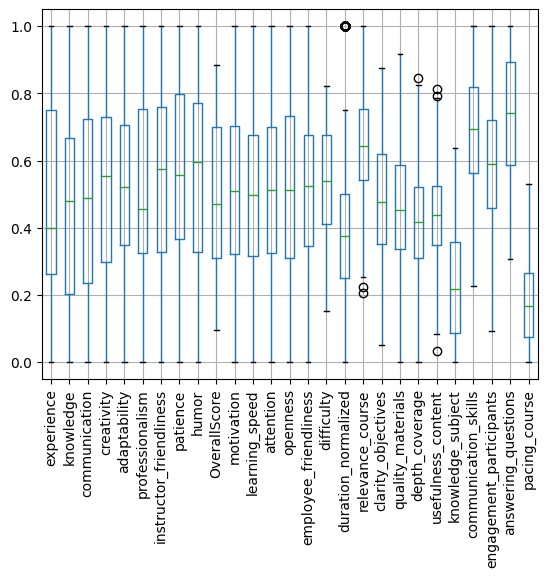

In [28]:
df.drop("duration_hours",axis=1).boxplot(rot=90)

#### Box Plots of the scores for each instructor category (poor, average, good):

<Axes: >

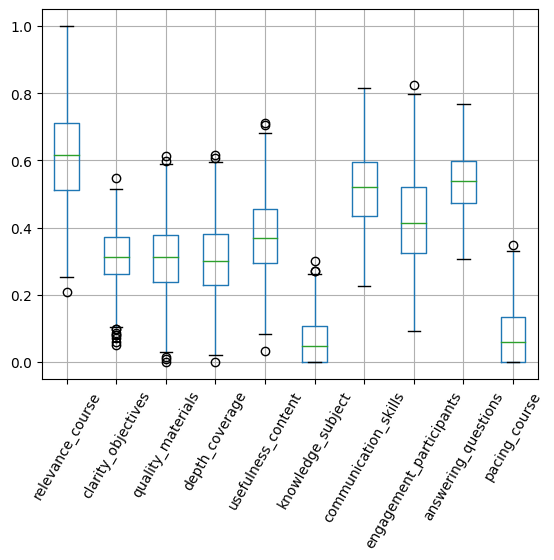

In [29]:
df.iloc[0:999,21:].boxplot(rot=60) # bad 

<Axes: >

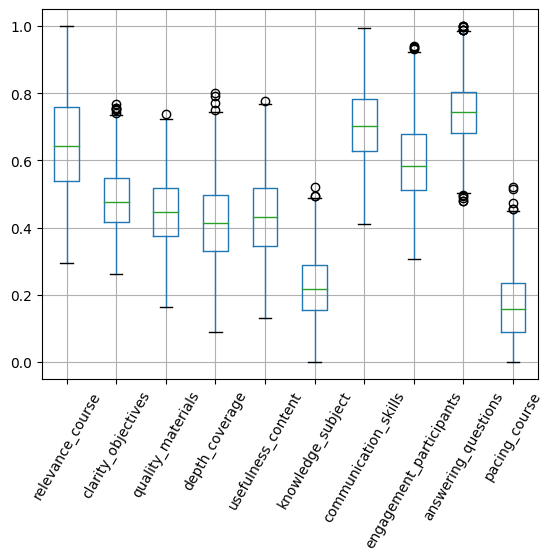

In [30]:
df.iloc[1000:1999,21:].boxplot(rot=60) # medium

<Axes: >

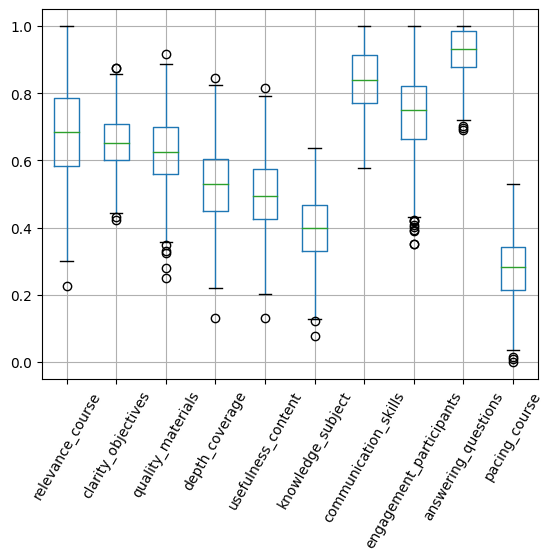

In [31]:
df.iloc[2000:2999,21:].boxplot(rot=60) # good

In [32]:
df.head()

,instructor_Name,experience,knowledge,communication,creativity,adaptability,professionalism,instructor_friendliness,patience,humor,...,relevance_course,clarity_objectives,quality_materials,depth_coverage,usefulness_content,knowledge_subject,communication_skills,engagement_participants,answering_questions,pacing_course
0,Zouhair Mnif,0.092402,0.0,0.303828,0.103761,0.248058,0.326658,0.577916,1.0,0.626783,...,0.629137,0.333927,0.233029,0.288963,0.384528,0.021245,0.602569,0.653637,0.648004,0.011067
1,Zouhair Mnif,0.092402,0.0,0.303828,0.103761,0.248058,0.326658,0.577916,1.0,0.626783,...,0.546387,0.304260,0.214027,0.212089,0.295754,0.000000,0.611622,0.663104,0.658300,0.000000
2,Zouhair Mnif,0.092402,0.0,0.303828,0.103761,0.248058,0.326658,0.577916,1.0,0.626783,...,0.856010,0.375393,0.362114,0.382406,0.517475,0.109896,0.739676,0.772184,0.729433,0.157795
3,Zouhair Mnif,0.092402,0.0,0.303828,0.103761,0.248058,0.326658,0.577916,1.0,0.626783,...,0.516527,0.233048,0.219841,0.204732,0.282381,0.000000,0.577759,0.628453,0.622073,0.026766
4,Zouhair Mnif,0.092402,0.0,0.303828,0.103761,0.248058,0.326658,0.577916,1.0,0.626783,...,0.496834,0.262490,0.205752,0.211051,0.267491,0.000000,0.570723,0.623333,0.620785,0.000000


In [33]:
!rm -rf  "/kaggle/working/Feedback_Dataset.csv"
df.to_csv("Feedback_Dataset.csv")

### Sampling

<Axes: >

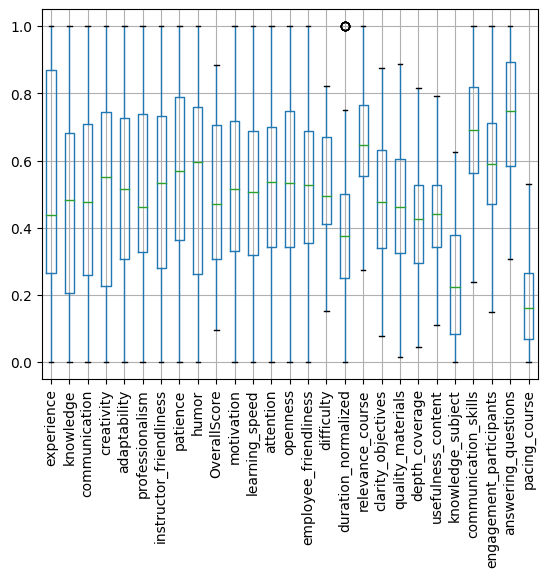

In [35]:
samples=[df.iloc[0:999,:].sample(100),df.iloc[1000:1999,:].sample(100),df.iloc[2000:2999,:].sample(100)]
sample=pd.concat(samples)
sample.drop('duration_hours',axis=1,inplace=True)
sample.boxplot(rot=90)

This code extracts a sample of data from DataFrame `df` and performs the following operations:

1. **Sampling**: Three samples of 100 rows each are taken from three separate segments of DataFrame `df`:
- The first 100 rows are taken from rows 0 to 999 (poor formatters).
- The next 100 rows are taken from rows 1000 to 1999 (average formatters).
- The last 100 rows are taken from rows 2000 to 2999 (good formatters).

2. **Concatenation**: The three samples are concatenated into a single DataFrame `sample`.

This code allows you to visualize the distribution of the sampled data without the `duration_hours` column.

# PART II: Generating Text Feedback

We can generate text feedback for each line using the Cohere API and some Prompt Engineering techniques. The free API is<span style="color:red">  rate limited</span>, so we'll only generate a few examples.

## 1- Cohere 

### prompt engineering
Prompt engineering is the process of designing and formulating specific instructions or questions to effectively interact with artificial intelligence models, such as language models. The goal is to obtain accurate and relevant answers by optimizing the way prompts are structured and presented.

In [34]:
base_prompt="employees give feedback to a course by an instructors, here are the list of characteristics for each object, \
each one is rated on a scale from 0 to 1, your job is to generate a text feedback as the employee (Don't address the instructor) based on all of those factors to give feedback \
on the course and instructor, appreciation, complaints, etc . based on the extreme values.\
Keep it short(max 20 words), professional and a creative (make up senarios or describe them (don't just repeat the attributes below)\n"
def dynamic_prompt(i):
    prompt_params=""
    d=dict(df.iloc[i,:11]) #Instructor
    for e in d:
        if type(d[e])!=str:
            d[e]=round(d[e],3)
    prompt_params+="Instructor="+str(d)+"\n"

    d=dict(df.iloc[i,11:17]) #employee
    for e in d:
        if type(d[e])!=str:
            d[e]=round(d[e],3)
    prompt_params+="Employee="+str(d)+"\n"

    d=dict(df.iloc[i,17:20]) # course
    for e in d:
        if type(d[e])!=str:
            d[e]=round(d[e],3)
    prompt_params+="Course="+str(d)+"\n"

    d=dict(df.iloc[i,21:]) # feedback
    for e in d:
        if type(d[e])!=str:
            d[e]=round(d[e],3)
    prompt_params+="Feedback="+str(d)+"\n"
    return prompt_params
    
prompt_params=dynamic_prompt(0)
s=base_prompt+prompt_params
print(s)

employees give feedback to a course by an instructors, here are the list of characteristics for each object, each one is rated on a scale from 0 to 1, your job is to generate a text feedback as the employee (Don't address the instructor) based on all of those factors to give feedback on the course and instructor, appreciation, complaints, etc . based on the extreme values.Keep it short(max 20 words), professional and a creative (make up senarios or describe them (don't just repeat the attributes below)
Instructor={'instructor_Name': 'Zouhair Mnif', 'experience': 0.092, 'knowledge': 0.0, 'communication': 0.304, 'creativity': 0.104, 'adaptability': 0.248, 'professionalism': 0.327, 'instructor_friendliness': 0.578, 'patience': 1.0, 'humor': 0.627, 'OverallScore': 0.253}
Employee={'employee_Name': 'Maher Sghaier', 'motivation': 0.654, 'learning_speed': 0.523, 'attention': 0.641, 'openness': 0.479, 'employee_friendliness': 0.348}
Course={'course_Name': 'DevOps in Healthcare', 'duration_hour

### Model & Utilization

In [36]:
!python -m pip install cohere --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.8/173.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
  Attempting uninstall: fastavro
    Found existing installation: fastavro 1.9.3
    Uninstalling fastavro-1.9.3:
      Successfully uninstalled fastavro-1.9.3
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.106
    Uninstalling botocore-1.34.106:
      Successfully uninstalled botocore-1.34.106
  Attempting uninstall: s3transfer


In [37]:
import cohere
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("Api_key")

# Upload a dataset for embed jobs
co=cohere.Client(api_key)
response = co.chat(
    message=s
)
print(response)

text='Anis Ltaief\'s creative teaching style kept the course interesting. However, their lack of knowledge and poor communication skills made the course difficult to follow at times. More experience would benefit future courses. \n\nThe course, "Introduction to Cybersecurity," was well-paced and relevant. The content could be more useful and engaging, with better-quality materials. \n\nOverall, an average experience with room for improvement.' generation_id='4d4bc5b9-c46f-46a2-954b-01543a50eb71' citations=None documents=None is_search_required=None search_queries=None search_results=None finish_reason='COMPLETE' tool_calls=None chat_history=[Message_User(message="employees give feedback to a course by an instructors, here are the list of characteristics for each object, each one is rated on a scale from 0 to 1, your job is to generate a text feedback as the employee based on all of those factors to give feedback on the course and instructor, appreciation, complaints, etc . based on the

In [38]:
response.text

'Anis Ltaief\'s creative teaching style kept the course interesting. However, their lack of knowledge and poor communication skills made the course difficult to follow at times. More experience would benefit future courses. \n\nThe course, "Introduction to Cybersecurity," was well-paced and relevant. The content could be more useful and engaging, with better-quality materials. \n\nOverall, an average experience with room for improvement.'

Limited use of the API is due to resource or cost constraints, but the model remains adequate for text completion and generation due to its ability to understand and produce coherent and relevant responses.

## LLama 3.1
The ``Llama 3.1`` Meta Collection of Large Multilingual Language Models (LLM) is a collection of pre-trained, instruction-optimized generative models in sizes 8B, 70B, and 405B (text-in/text-out). The instruction-optimized text-only models (8B, 70B, 405B) are optimized for multilingual dialog use cases and outperform many open-source and closed-source chat models available on common industry benchmarks.

### Prompt engineering

In [39]:
role="You are a company employee who just had a course and are required to give a 2-line feedback on the course and on the instructor, your speech is minimalist and consists of 2 bulletpoints"
Base_prmopt="don't refer to the course or instructor by their names , provide an honest short 2-sentence feedback (don't shy to Critique bad traits) based on these information, (from a scale form 0 to 1):"

### Model & Utilization

In [40]:
# Necessary until transformers packages is updated in the Kaggle notebook environment.
!pip install --upgrade transformers

import transformers
import torch

torch.backends.cuda.enable_mem_efficient_sdp(False)
torch.backends.cuda.enable_flash_sdp(False)

model_id = "/kaggle/input/llama-3.1/transformers/8b-instruct/1"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 54.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


2024-08-01 10:18:42.625705: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 10:18:42.625806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 10:18:42.758437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

#### Function for calls to the model:

In [41]:
def get_answer(prompt):
    messages = [
        {"role": "system", "content": role},
        {"role": "user", "content": prompt},
    ]
    outputs = pipeline(
        messages,
        max_new_tokens=256,
    )
    res=outputs[0]["generated_text"][-1]["content"]
    pos=max(res.find('•'),res.find('*'))
    res=res[pos:] if pos>-1 else res
    return res

In [42]:
from time import time
t1=time()
sample["text"]=sample.index.to_series().apply(get_answer)
print(f"took: {time()-t1} seconds")
sample.to_csv("Feedback_Dataset_Sample.csv")
sample


took: 707.4810290336609 seconds


,instructor_Name,experience,knowledge,communication,creativity,adaptability,professionalism,instructor_friendliness,patience,humor,...,clarity_objectives,quality_materials,depth_coverage,usefulness_content,knowledge_subject,communication_skills,engagement_participants,answering_questions,pacing_course,text
410,Ines Abdelkafi,0.011204,0.016813,0.187270,0.705654,0.519215,0.323670,0.362714,0.175871,0.729402,...,0.437712,0.463809,0.422708,0.550994,0.110209,0.712169,0.537570,0.570105,0.197195,• The course content was relevant and informat...
60,Dalila Zemni,0.384140,0.220349,0.219831,0.000000,0.000000,0.000000,0.000000,0.000000,0.048019,...,0.328015,0.254833,0.385720,0.435760,0.001797,0.438799,0.266360,0.464342,0.026030,* The course was informative and covered the n...
902,Sihem Ben Yedder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.589372,0.525004,0.563515,...,0.148218,0.119164,0.226691,0.274157,0.000000,0.397506,0.432748,0.416621,0.000000,* The course was informative and covered the n...
69,Dalila Zemni,0.384140,0.220349,0.219831,0.000000,0.000000,0.000000,0.000000,0.000000,0.048019,...,0.281976,0.265354,0.431279,0.499605,0.063874,0.444451,0.254313,0.416896,0.069714,• The course was informative and helpful for m...
458,Naima Najjar,0.018386,0.000000,0.109327,0.538542,0.258743,0.000000,0.233858,0.229273,0.575006,...,0.303602,0.389918,0.304562,0.402775,0.059208,0.596641,0.471270,0.521934,0.116021,* The course was informative and covered the n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,Beya Kouki,0.935709,0.541570,0.908423,0.351848,0.402415,0.957371,0.788466,1.000000,0.866434,...,0.594942,0.438221,0.385029,0.343439,0.189853,0.759034,0.719581,0.865033,0.106663,• The course was informative and covered the n...
2802,Najla Miladi,0.839759,0.615074,0.831470,1.000000,0.754641,0.619974,0.774573,0.843772,0.950088,...,0.761265,0.731754,0.592093,0.593745,0.467232,0.975145,0.867685,0.981609,0.355926,• The course content was relevant and informat...
2175,Habib Ben Miled,1.000000,1.000000,0.478812,0.647663,0.790924,0.931201,0.812350,0.737131,0.492493,...,0.693287,0.714326,0.672589,0.569245,0.506362,0.796821,0.710824,0.984807,0.330824,• The course content was informative and relev...
2370,Moncef Jemai,1.000000,1.000000,0.943647,0.995375,0.868541,0.896625,0.342795,0.349323,0.000000,...,0.851892,0.856769,0.650011,0.618855,0.619744,0.966925,0.684355,1.000000,0.429090,• The course provided relevant information tha...


### model and sample choice
running the Llama 3.1 8b-instruct model on a kaggle notebook with 2 T4 GPUs takes between 2 and 8 seconds for each iteration, with 3000 rows in the dataset the estimated execution time takes several hours at minimum, that's why the sample of only 300 rows was created

### Sentiment Analysis

We opt for NLTK for sentiment analysis, this library offers a wide range of tools and resources for natural language processing, including powerful classification algorithms and well-established sentiment lexicons. However it's show below how to train your own sentiment analysis model.

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
example_feedback=sample.iloc[0,-1]
sentences=sent_tokenize(example_feedback)

analyzer = SentimentIntensityAnalyzer()

for sent in sentences:
    print(sent,analyzer.polarity_scores(example_feedback))
# # 
# 


• The course content was relevant and informative. {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.34}
• The instructor was knowledgeable and engaging. {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.34}


This code extracts a sample feedback from DataFrame `sample` and analyzes the sentiment of each sentence.

The `polarity_scores` function is part of NLTK's `SentimentIntensityAnalyzer` library. It is used to analyze the sentiment of a given text. This function returns a dictionary containing four scores:

- **neg** : Negative sentiment score (value between 0 and 1).
- **neu** : Neutral sentiment score (value between 0 and 1).
- **pos** : Positive sentiment score (value between 0 and 1).
- **compound** : Overall sentiment score, which is a normalized combination of previous scores (value between -1 and 1).

These scores allow to quantify the sentiment expressed in the analyzed text.

This code allows to evaluate the sentiment of each sentence in a given feedback.

### Adding a new variable ``sentiment_score`` to the dataset
for each feedback line we perform the sentiment analysis and associate the calculated score, this serves as a data label.

In [52]:
def sentiment_score(text):
    sentences=sent_tokenize(text)

    analyzer = SentimentIntensityAnalyzer()
    score=0
    for sent in sentences:
        score+=analyzer.polarity_scores(sent)['compound']/len(sentences)
    return score

In [53]:
sample["sentiment_score"]=sample["text"].apply(sentiment_score)

In [55]:
sample.describe()

,experience,knowledge,communication,creativity,adaptability,professionalism,instructor_friendliness,patience,humor,OverallScore,...,clarity_objectives,quality_materials,depth_coverage,usefulness_content,knowledge_subject,communication_skills,engagement_participants,answering_questions,pacing_course,sentiment_score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.509170,0.461608,0.495978,0.513725,0.508404,0.505903,0.520989,0.561993,0.528561,0.503611,...,0.485605,0.464157,0.417296,0.436944,0.236889,0.684969,0.578815,0.735367,0.173019,0.275985
std,0.343105,0.328587,0.297042,0.317081,0.274768,0.302956,0.281951,0.290387,0.307207,0.238283,...,0.174783,0.182986,0.153159,0.128307,0.174174,0.171731,0.174905,0.182571,0.126032,0.136152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095297,...,0.079097,0.014598,0.045433,0.110028,0.000000,0.238158,0.148085,0.306913,0.000000,0.000000
25%,0.264687,0.205709,0.258839,0.225729,0.306457,0.328371,0.279340,0.363377,0.263442,0.305736,...,0.339023,0.323838,0.295425,0.343838,0.083019,0.563662,0.471491,0.583007,0.068952,0.190900
50%,0.438884,0.482849,0.477725,0.549523,0.514690,0.461542,0.533973,0.569836,0.594058,0.469633,...,0.476136,0.462820,0.424643,0.440365,0.224227,0.691530,0.589360,0.747698,0.160597,0.200950
75%,0.870417,0.680836,0.709364,0.745240,0.725304,0.738944,0.731299,0.788462,0.760528,0.707027,...,0.630605,0.605567,0.528181,0.526594,0.378967,0.819759,0.711900,0.892183,0.266374,0.401650
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.884228,...,0.875108,0.887186,0.815336,0.792864,0.625044,1.000000,1.000000,1.000000,0.529038,0.859000


### (Optional) French Language Translation

For this project we chose to generate feedback in french, however this should be a viable option with any other language, (with some exceptions to language specific stopwords, more details in below section ). For this purpose we use the googletrans module, it is a module that uses the unofficial Google Translate API to detect languages ​​and translate text,
it is still limited in throughput when dealing with a large dataset, but it can handle a few thousand calls with excellent performance.

In [56]:
pip install googletrans==4.0.0-rc1

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=7a9a026d79448ca58a5b2a19f531b9ab1d72b7c1c2a129352015cdb2fa4b3c0d
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
     

In [57]:
#code to detect and translate language 
from googletrans import Translator
from nltk.tokenize import sent_tokenize
def to_fr(text):
    # Create a Translator object
    translator = Translator()
    translated_text = translator.translate(text, src='en', dest='fr').text
    return translated_text

### Adding a new column ``text_french`` for the French translated version

In [58]:
sample["text_french"]=sample["text"].apply(to_fr)

In [149]:
sample.loc[sample['sentiment_score']>=0.5]['text_french'].values

array(["* Le contenu du cours était pertinent pour mon travail et m'a aidé à améliorer mes compétences.\n* L'instructeur était clair et concis dans sa livraison et a fourni des exemples utiles.",
       "• Le contenu du cours était pertinent et informatif, m'aidant à améliorer mes compétences.\n• L'instructeur était compétent et engageant, ce qui rendait l'expérience d'apprentissage agréable.",
       "• Le cours a été informatif et utile pour améliorer mes compétences.\n• L'instructeur a été compétent et efficace dans la livraison du contenu.",
       "• Cours: Le cours a été informatif et m'a aidé à mieux comprendre le sujet.\n• Instructeur: l'instructeur était clair dans leurs explications et a rendu le matériau facile à saisir.",
       "** Retour de cours **: Le cours a fourni un bon aperçu du sujet, mais j'aurais aimé plus d'exercices de pratique.\n• ** Feedback de l'instructeur **: L'instructeur était bien informé et clair dans leurs explications, mais aurait pu être plus engage

In [61]:
sample.iloc[:10,-3:]

,text,sentiment_score,text_french
410,• The course content was relevant and informat...,0.17000,• Le contenu du cours était pertinent et infor...
60,* The course was informative and covered the n...,0.19090,* Le cours était informatif et couvrait le mat...
902,* The course was informative and covered the n...,0.20095,* Le cours était informatif et couvrait le mat...
69,• The course was informative and helpful for m...,0.40165,• Le cours était informatif et utile pour mon ...
458,* The course was informative and covered the n...,0.19090,* Le cours était informatif et couvrait le mat...
387,• The course content was relevant to my job.\n...,0.19090,• Le contenu du cours était pertinent pour mon...
506,• The course provided useful information that ...,0.41110,• Le cours a fourni des informations utiles qu...
19,• The course was informative and helped me und...,0.41110,• Le cours a été informatif et m'a aidé à mieu...
919,* The course was informative and relevant to m...,0.19090,* Le cours était informatif et pertinent pour ...
169,* The course content was relevant to my job ro...,0.19090,* Le contenu du cours était pertinent pour mon...


# PART III: Machine Learning

## Sentiment Classification with a Neural Network

1. ### Visualization

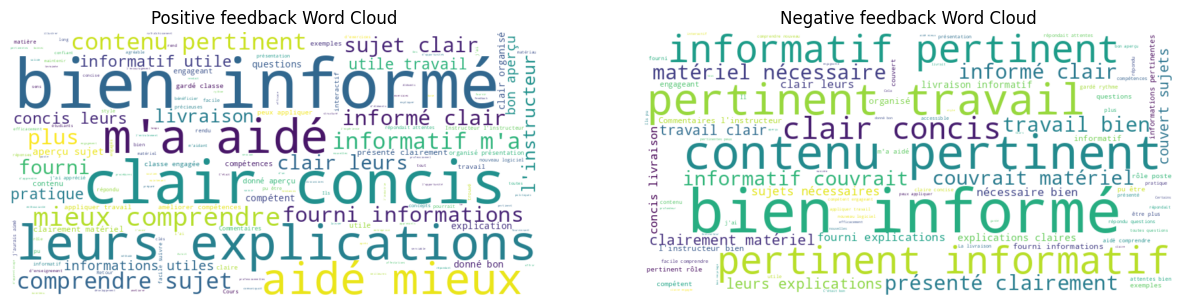

In [113]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

positive=sample.loc[sample['sentiment_score']>=0.4]["text_french"].values
negative=sample.loc[sample['sentiment_score']<0.4]["text_french"].values

def remove_stopwords(text):
    return ' '.join([token for token in word_tokenize(text) if token not in stopwords.words('french')+['*','•']+['Le','Le cours',"L'instructeur","cours"]])


sample_positive_text = " ".join(remove_stopwords(text) for text in positive)
sample_negative_text = " ".join(remove_stopwords(text) for text in negative)

wordcloud_positive = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(sample_positive_text)
wordcloud_negative = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(sample_negative_text)

# Display the generated image using matplotlib
plt.figure(figsize=(15, 7.5))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive feedback Word Cloud')
plt.axis("off")

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative feedback Word Cloud')
plt.axis("off")

plt.show()

2. ### Model Training and Validation

Training set class distribution:
 sentiment_score
negatif    172
positif     68
Name: count, dtype: int64
Validation set class distribution:
 sentiment_score
negatif    47
positif    13
Name: count, dtype: int64
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 718ms/step - accuracy: 0.4863 - loss: 0.6947 - val_accuracy: 0.8000 - val_loss: 0.6418
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8333 - loss: 0.6292 - val_accuracy: 0.8000 - val_loss: 0.5838
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7611 - loss: 0.5757 - val_accuracy: 0.8000 - val_loss: 0.5339
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7854 - loss: 0.5272 - val_accuracy: 0.8333 - val_loss: 0.4888
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7988 - loss: 0.4797 - val_accuracy: 0.8333 - val_loss: 0.4477
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8019 - loss: 0.4414 - val_accuracy: 0.8667 - val_loss: 0.4115
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8286 - loss: 0.4023 - val_accuracy: 0.8833 - val_loss: 0.3803
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8559 - loss: 0.3700 - val_accuracy: 0.9000 - val_loss: 0.3532
Epoch 9/10

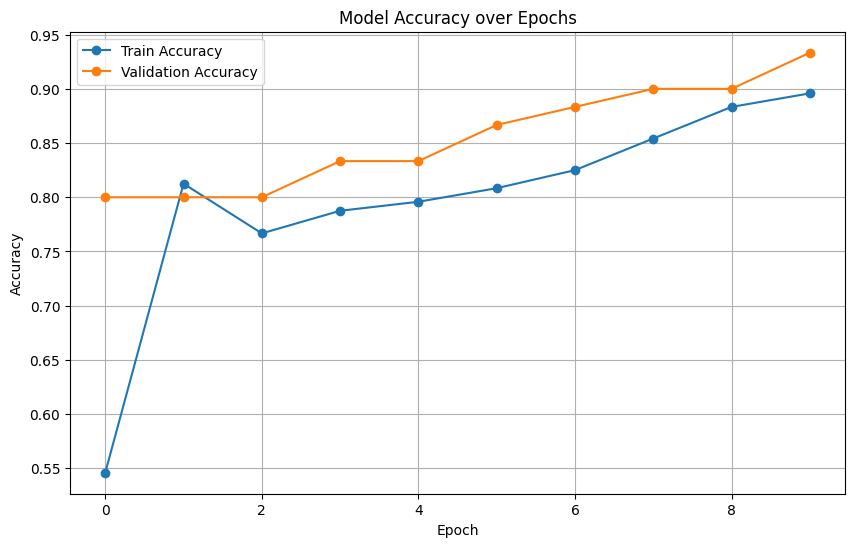

In [144]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))#,stop_words=stopwords.words('french')+['*','•']+['Le','Le cours',"L'instructeur","cours"])

# Train and test split
target=sample['sentiment_score'].apply(lambda x: "positif" if x >= 0.4 else "negatif")


X_train, X_val, y_train, y_val = train_test_split(sample["text_french"], target, test_size=0.2,random_state=42)

# After vectorizing the text data using TF-IDF
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)

# Convert the sparse matrix to a dense matrix
X_train_vectorized = X_train_vectorized.todense()
X_val_vectorized = X_val_vectorized.todense()

print("Training set class distribution:\n", y_train.value_counts())
print("Validation set class distribution:\n", y_val.value_counts())


# Convert labels to one-hot encoding
encoder = LabelEncoder()
y_train_encoded = to_categorical(encoder.fit_transform(y_train))
y_val_encoded = to_categorical(encoder.transform(y_val))

# Define a simple neural network model
model = Sequential()
model.add(Dense(512, input_shape=(X_train_vectorized.shape[1],), activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 because we have two classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model over epochs
history = model.fit(X_train_vectorized, y_train_encoded, epochs=10, batch_size=128, 
                    validation_data=(X_val_vectorized, y_val_encoded), verbose=1)

# Plotting the model accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

3. ### Model usage example

In [153]:
# Example feedback
example_feedback1 = ["Le contenu du cours était pertinent et informatif, m'aidant à améliorer mes compétences.\n• L'instructeur était compétent et engageant, ce qui rendait l'expérience d'apprentissage agréable."]
example_feedback2 = ["un bon cours mais mal présenté, l'instructeur n'etait pas serieux"]

feedbacks=[example_feedback1,example_feedback2]
for feedback in feedbacks:
    # Preprocess and vectorize the example feedback
    example_feedback_vectorized = vectorizer.transform(feedback).todense()

    # Use the trained model to predict
    prediction = model.predict(example_feedback_vectorized)

    # Decode the prediction to get the class label
    predicted_class = encoder.inverse_transform(np.argmax(prediction, axis=1))

    print(f"Example feedback: {feedback[0]}")
    print(f"Predicted sentiment: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Example feedback: Le contenu du cours était pertinent et informatif, m'aidant à améliorer mes compétences.
• L'instructeur était compétent et engageant, ce qui rendait l'expérience d'apprentissage agréable.
Predicted sentiment: positif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Example feedback: un bon cours mais mal présenté, l'instructeur n'etait pas serieux
Predicted sentiment: negatif


## Clustering

This part performs clustering of feedback data using the Gaussian Mixture Model (GMM).
#### Why clustering?
Clustering is an unsupervised learning technique that allows to group similar data into clusters. In this context, feedback clustering allows to:
- Identify groups of employees with similar feedback profiles.
- Understand different trends and behaviors within the data.
- Facilitate data analysis and visualization by segmenting them into homogeneous groups.

#### What makes GMM special?
The Gaussian Mixture Model (GMM) is a clustering method that has several advantages:
- **Flexibility**: Unlike other clustering methods like K-means, GMM can model clusters of various shapes (not only spherical).
- **Probabilities**: GMM assigns each data point a probability of belonging to each cluster, which allows for a more nuanced classification.
- **Multiple Components**: GMM uses multiple Gaussian distributions to model the data, which allows for capturing complex structures in the data. Since our dataset is formulated using a Gaussian model, using GMM is optimal.

In summary, clustering with GMM allows for flexible and precise segmentation of data, taking into account the different shapes and structures present in the feedback data.

### Visualization of the generated clusters

In [166]:
from sklearn.mixture import GaussianMixture

observed_data=df.iloc[:,21:] # feedback variables


gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components as needed
gmm.fit(observed_data)

labels = gmm.predict(observed_data)

df['Cluster'] = labels

# Print resulting clusters
df

,instructor_Name,experience,knowledge,communication,creativity,adaptability,professionalism,instructor_friendliness,patience,humor,...,clarity_objectives,quality_materials,depth_coverage,usefulness_content,knowledge_subject,communication_skills,engagement_participants,answering_questions,pacing_course,Cluster
0,Zouhair Mnif,0.092402,0.00000,0.303828,0.103761,0.248058,0.326658,0.577916,1.000000,0.626783,...,0.333927,0.233029,0.288963,0.384528,0.021245,0.602569,0.653637,0.648004,0.011067,2
1,Zouhair Mnif,0.092402,0.00000,0.303828,0.103761,0.248058,0.326658,0.577916,1.000000,0.626783,...,0.304260,0.214027,0.212089,0.295754,0.000000,0.611622,0.663104,0.658300,0.000000,0
2,Zouhair Mnif,0.092402,0.00000,0.303828,0.103761,0.248058,0.326658,0.577916,1.000000,0.626783,...,0.375393,0.362114,0.382406,0.517475,0.109896,0.739676,0.772184,0.729433,0.157795,2
3,Zouhair Mnif,0.092402,0.00000,0.303828,0.103761,0.248058,0.326658,0.577916,1.000000,0.626783,...,0.233048,0.219841,0.204732,0.282381,0.000000,0.577759,0.628453,0.622073,0.026766,2
4,Zouhair Mnif,0.092402,0.00000,0.303828,0.103761,0.248058,0.326658,0.577916,1.000000,0.626783,...,0.262490,0.205752,0.211051,0.267491,0.000000,0.570723,0.623333,0.620785,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Leila Kacem,0.510686,0.93804,0.680885,0.811790,0.555237,0.737344,0.726086,0.548551,0.549977,...,0.573356,0.557459,0.445782,0.392640,0.398038,0.783033,0.639800,0.867578,0.142283,2
2996,Leila Kacem,0.510686,0.93804,0.680885,0.811790,0.555237,0.737344,0.726086,0.548551,0.549977,...,0.676812,0.630681,0.622117,0.515257,0.460710,0.768636,0.643748,0.908213,0.234857,2
2997,Leila Kacem,0.510686,0.93804,0.680885,0.811790,0.555237,0.737344,0.726086,0.548551,0.549977,...,0.612680,0.569582,0.443630,0.386154,0.377235,0.821993,0.678882,0.906901,0.140131,2
2998,Leila Kacem,0.510686,0.93804,0.680885,0.811790,0.555237,0.737344,0.726086,0.548551,0.549977,...,0.649283,0.602605,0.595986,0.521938,0.399971,0.759397,0.632208,0.892072,0.223911,2


# Conclusion

In conclusion, this paper presents a comprehensive methodology for employee feedback simulation and analysis, highlighting several advanced techniques:

1. **Simulation and Synthetic Data Generation**: Using multinormal distributions, we were able to generate realistic datasets that mimic real-world feedback. This approach allows creating diverse and representative data without requiring large amounts of real-world data.

2. **Feature Engineering**: This crucial step consists of transforming raw data into meaningful features that can be used by machine learning models. By selecting and creating relevant features, we improve the performance and accuracy of the models.

3. **Natural Language Processing (NLP)**: Feedback sentiment analysis allows quantifying the emotions expressed in textual comments. Using NLP techniques, we can extract valuable insights into employee satisfaction and concerns.

4. **Classification**: By applying classification algorithms, we can categorize the feedback into different predefined classes. This helps segment the data and facilitates the analysis of trends specific to each category.

5. **Clustering**: The Gaussian Mixture Model (GMM) is used to group the data into clusters. This flexible method captures complex structures and models clusters of various shapes. Clustering helps identify groups of employees with similar feedback profiles, which is essential for in-depth analysis.

By combining these techniques, we were able to gain a detailed and nuanced understanding of employee feedback. This integrated approach helps improve training programs, tailor teaching methods, and optimize overall employee satisfaction.